**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Proyecto Integrador -TC5035**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

Avance 1. Análisis exploratorio de datos

**- Equipo 37** <p>Perla Fernanda Bazán Barajas<p> Ignacio Garay Ruíz<p> David Cruz Beltrán

**- Matrículas** <p>A01420700<p> A01795753<p> A01360416

**DISCLAIMER**:
En este análisis, vamos a continuar incorporando datos a medida que avanza el proceso, pero en esta actividad hemos utilizado los datos que pudimos obtener y descargar hasta el momento.

**INTRODUCCIÓN**
<p>En esta libreta estaremos analizando un conjunto de datos provenientes de varias campañas publicitarias. Este conjunto se extrajo manualmente de 10 campañas distintas, es decir, se adaptaron los banners de 10 campañas distintas para ser estudiados.<p>

El conjunto de datos hace una comparación entre los banners y su key visual (el arte original del que se derivaron los banners), aunque no todos los banners cuentan con un key visual disponible. Los datos fueron extraídos directamente de los archivos editables de Photoshop, donde se realizó un proceso de depuración para dejar únicamente las capas relevantes para el análisis, optimizando así la recolección de datos.
<p>
Cabe destacar que estamos en proceso de obtener la autorización por parte de PepsiCo para utilizar campañas más recientes. Por lo tanto, los banners analizados corresponden a PFC (PepsiCo Foods Canada) y PBNA (PepsiCo Beverages North America), correspondientes a los años 2023 y 2024.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Aquí cada quien tiene que agregar el acceso directo de su carpeta compartida a su unidad de Drive
# Después poner la ruta correcta dependiendo del paso anterior
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/14. Proyecto integrador/Banners/PSD"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("banners_metadata.csv")
df.head()

,file,layer_name,type,priority,x,y,width,height,z_index,canvas_width,canvas_height,kv_canvas_width,kv_canvas_height,kv_x,kv_y,kv_width,kv_height,kv_z_index
0,Bubly_KV.psd,BACKGROUND,BACKGROUND,-1,0,0,1706,1706,0,1706,1706,1706.0,1706.0,0.0,0.0,1706.0,1706.0,0.0
1,Bubly_KV.psd,SUB HEADING,TEXT,2,381,1341,910,146,1,1706,1706,1706.0,1706.0,381.0,1341.0,910.0,146.0,1.0
2,Bubly_KV.psd,COPY,TEXT,2,172,219,1361,162,2,1706,1706,1706.0,1706.0,172.0,219.0,1361.0,162.0,2.0
3,Bubly_KV.psd,SKUs,PRODUCT,2,232,523,1273,570,3,1706,1706,1706.0,1706.0,232.0,523.0,1273.0,570.0,3.0
4,Gatorade_HBTW_KV.psd,BACKGROUND,BACKGROUND,-1,0,0,1920,1080,0,1920,1080,1920.0,1080.0,0.0,0.0,1920.0,1080.0,0.0


En esta parte del código se declara el data frame del archivo CSV para ir recibiendo los valores. Posteriormente, se despliegan las columnas de los datos a manera de visualización para empezar con la exploración.

#Análisis descriptivo (univariante)

Método info() del dataframe, para obtener el resumen de los tipos de datos.

**Resumen de los tipos de datos**

In [ ]:
info_summary = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file              331 non-null    object 
 1   layer_name        331 non-null    object 
 2   type              331 non-null    object 
 3   priority          331 non-null    int64  
 4   x                 331 non-null    int64  
 5   y                 331 non-null    int64  
 6   width             331 non-null    int64  
 7   height            331 non-null    int64  
 8   z_index           331 non-null    int64  
 9   canvas_width      331 non-null    int64  
 10  canvas_height     331 non-null    int64  
 11  kv_canvas_width   245 non-null    float64
 12  kv_canvas_height  245 non-null    float64
 13  kv_x              213 non-null    float64
 14  kv_y              213 non-null    float64
 15  kv_width          213 non-null    float64
 16  kv_height         213 non-null    float64
 1

A partir de los datos recopilados y estructurados en este primer análisis, se obtuvieron 331 elementos (capas) provenientes de diferentes archivos de banners. Todos estos registros contienen información completa sobre su posición, tamaño, tipo y jerarquía visual dentro del lienzo original.
<p>
Es importante destacar que solo una parte de los banners (245 de 331) cuenta con información de su respectivo key visual (KV), como dimensiones del lienzo o ubicación de los elementos en el arte original. Esta disparidad sugiere que no todos los banners estaban vinculados a un key visual.<p>
En general, esta primera fase proporciona una base sólida para comenzar a identificar patrones en la adaptación de elementos visuales desde los key visuals a sus respectivas piezas derivadas. A medida que se incorporen más datos, será posible realizar análisis más profundos sobre consistencia visual, jerarquía, escalabilidad y adaptación gráfica entre diferentes formatos de campaña.

##**Columnas**

In [ ]:
num_columns = df.select_dtypes(include=np.number).shape[1]
cual_columns = df.select_dtypes(include='object').shape[1]

In [ ]:
print(f"\nNúmero de columnas numéricas: {num_columns}")
print(f"Número de columnas cualitativas: {cual_columns}")


Número de columnas numéricas: 15
Número de columnas cualitativas: 3


Se realiza un análisis sobre la clasificación de los datos, donde las columnas <i>file, layer_name</i> y <i>type</i> son las únicas clasificadas como variables cualitativas. Por otro lado, el resto de las columnas, un total de 15, son numéricas.

## Porcentaje de valores faltantes por columna

In [ ]:
porcentaje_faltante = df.isna().mean()*100

porcentaje_faltante = porcentaje_faltante[porcentaje_faltante > 0]

print(porcentaje_faltante)

kv_canvas_width     25.981873
kv_canvas_height    25.981873
kv_x                35.649547
kv_y                35.649547
kv_width            35.649547
kv_height           35.649547
kv_z_index          35.649547
dtype: float64


**Datos Faltantes y la Relación con los Key Visuals**
<p>La base de datos presenta datos faltantes en varias columnas relacionadas con las dimensiones y las posiciones del key visual (KV). Estos datos faltantes están ligados principalmente a los banners que no cuentan con un key visual del cual se hayan derivado.<p>

Es importante entender que, aunque algunas campañas no tienen un key visual del que se adaptaron los banners, hay otras que sí lo tienen, pero <u>no todos los elementos presentes en el banner están reflejados en el key visual.</u> Esto ocurre porque, aunque el key visual sirve como base, los banners pueden incorporar elementos adicionales o específicos para cumplir con su propósito publicitario.<p>

Por ejemplo, un banner puede incluir un call to action que diga "Buy Now", pero este texto no estaba presente en el key visual original, ya que el objetivo de este arte original era diferente. Así, mientras que el key visual establece una referencia visual básica, los banners pueden incluir elementos o modificaciones que no están en el diseño original. Esta variabilidad es común y se debe a que los elementos del banner se ajustan según la campaña y los objetivos específicos del mismo.<p>

En resumen, la falta de coincidencia entre los elementos de los banners y sus respectivos key visuals no solo responde a la ausencia de estos últimos, sino también a las modificaciones intencionales que se hacen para cumplir con los requerimientos específicos de cada campaña.

## Normalización de datos

Para nuestras columnas (x, y) y (w,h) de elementos individuales conviene normalizarlos a escala de 0 a 1 para que el modelo en el futuro pueda generalizar mejor. Los tamaños del Key Visual y el canvas se quedan como están originalmente para que el modelo en el futuro pueda saber cómo se dieron las transformaciones.

In [ ]:
# Copiamos el df original
df_normalizado = df.copy()

# Creamos las columnas normalizadas
df_normalizado["x"] = df_normalizado["x"] / df_normalizado["canvas_width"]
df_normalizado["y"] = df_normalizado["y"] / df_normalizado["canvas_height"]
df_normalizado["width"] = df_normalizado["width"] / df_normalizado["canvas_width"]
df_normalizado["height"] = df_normalizado["height"] / df_normalizado["canvas_height"]

df_normalizado["kv_x"] = df_normalizado["kv_x"] / df_normalizado["kv_canvas_width"]
df_normalizado["kv_y"] = df_normalizado["kv_y"] / df_normalizado["kv_canvas_height"]
df_normalizado["kv_width"] = df_normalizado["kv_width"] / df_normalizado["kv_canvas_width"]
df_normalizado["kv_height"] = df_normalizado["kv_height"] / df_normalizado["kv_canvas_height"]

# Ahora eliminamos las columnas auxiliares de tamaño en píxeles
df_normalizado = df_normalizado.drop(columns=[
    "canvas_width","canvas_height","kv_canvas_width","kv_canvas_height"
])

In [ ]:
df_normalizado.head()

,file,layer_name,type,priority,x,y,width,height,z_index,kv_x,kv_y,kv_width,kv_height,kv_z_index
0,Bubly_KV.psd,BACKGROUND,BACKGROUND,-1,0.000000,0.000000,1.000000,1.000000,0,0.000000,0.000000,1.000000,1.000000,0.0
1,Bubly_KV.psd,SUB HEADING,TEXT,2,0.223329,0.786049,0.533411,0.085580,1,0.223329,0.786049,0.533411,0.085580,1.0
2,Bubly_KV.psd,COPY,TEXT,2,0.100821,0.128370,0.797773,0.094959,2,0.100821,0.128370,0.797773,0.094959,2.0
3,Bubly_KV.psd,SKUs,PRODUCT,2,0.135991,0.306565,0.746190,0.334115,3,0.135991,0.306565,0.746190,0.334115,3.0
4,Gatorade_HBTW_KV.psd,BACKGROUND,BACKGROUND,-1,0.000000,0.000000,1.000000,1.000000,0,0.000000,0.000000,1.000000,1.000000,0.0


## Análisis de variables numéricas

*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)

### **Utilizando la función describe().**

In [ ]:
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
priority,257.0,1.326848,1.260185,-1.000000,2.000000,2.000000,2.000000,3.000000
x,257.0,0.216075,0.253819,-0.062500,0.010000,0.113333,0.384545,0.903333
y,257.0,0.242462,0.275172,-0.033333,0.000000,0.125000,0.333333,0.928333
width,257.0,0.542106,0.353661,0.018421,0.223333,0.435758,0.946667,2.000000
height,257.0,0.593583,0.414812,0.010417,0.184000,0.572917,1.000000,1.777778
z_index,257.0,2.058366,1.622744,0.000000,1.000000,2.000000,3.000000,8.000000
kv_x,141.0,0.171146,0.155244,0.000000,0.093750,0.093750,0.402604,0.402604
kv_y,141.0,0.129310,0.044897,0.087963,0.087963,0.099074,0.194444,0.194444
kv_width,141.0,0.387672,0.220877,0.194271,0.194271,0.282292,0.475521,0.797773
kv_height,141.0,0.390091,0.212427,0.094959,0.281481,0.281481,0.671296,0.671296


In [ ]:
num_columns = df_normalizado.select_dtypes(include=['number'])

In [ ]:
asimetria_numericas = num_columns.skew()
curtosis_numericas = num_columns.kurt()

In [ ]:
print(f"Asimetría para variables numéricas: \n{asimetria_numericas}\n")
print(f"Curtosis para variables numéricas: \n{curtosis_numericas}\n")

Asimetría para variables numéricas: 
priority     -1.471523
x             0.949635
y             0.957324
width         0.638944
height        0.430998
z_index       0.543474
kv_x          1.130121
kv_y          0.739694
kv_width      0.159910
kv_height     0.314933
kv_z_index    0.253643
dtype: float64

Curtosis para variables numéricas: 
priority      0.317162
x            -0.144964
y            -0.239409
width         0.048269
height       -0.847777
z_index      -0.288409
kv_x         -0.166067
kv_y         -0.785859
kv_width     -1.411645
kv_height    -1.686416
kv_z_index   -1.154289
dtype: float64



*   **Asimetría (Skewness)**
<p>Mide la falta de simetría en una distribución.</p>
<p>Una distribución simétrica tiene un coeficiente de asimetría <u>cercano a cero.</u></p>
<p>Si la cola derecha (valores más altos) es más larga, <u>la asimetría será positiva.</u></p>
<p>Si la cola izquierda (valores más bajos) es más larga, <u>la asimetría será negativa.</u></p>

<p><p></p></p>

*   **Curtosis (Kurt)**
<p>Mide la forma de las colas de la distribución y la concentración de los datos en comparación con una distribución normal.</p>
<p>Una distribución con <u>curtosis cero (llamada mesocúrtica)</u> tiene colas que son ni muy largas ni muy cortas en comparación con una distribución normal.</p>
<p><u>Curtosis positiva (leptocúrtica)</u> indica colas más pesadas que la distribución normal, lo que significa que hay <u>más datos en las colas.</u></p>
<p><u>Curtosis negativa (platicúrtica)</u> indica colas más ligeras que la distribución normal, lo que significa que hay <u>menos datos en las colas.</u></p>

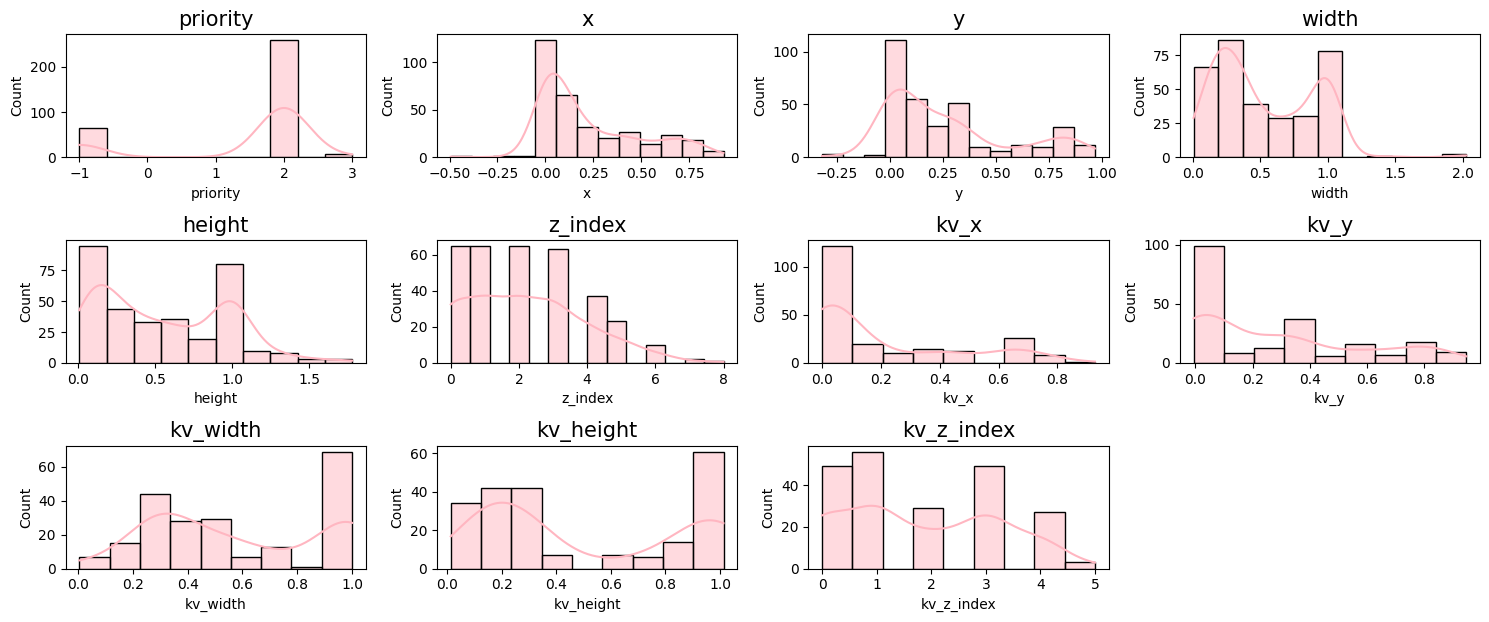

In [ ]:
plt.figure(figsize=(15, 10))
for i, columna in enumerate(num_columns, 1):
  plt.subplot(5, 4, i)
  sns.histplot(df_normalizado[columna], kde=True, color='lightpink')
  plt.title(f'{columna}', fontsize=15)

plt.tight_layout()
plt.show()

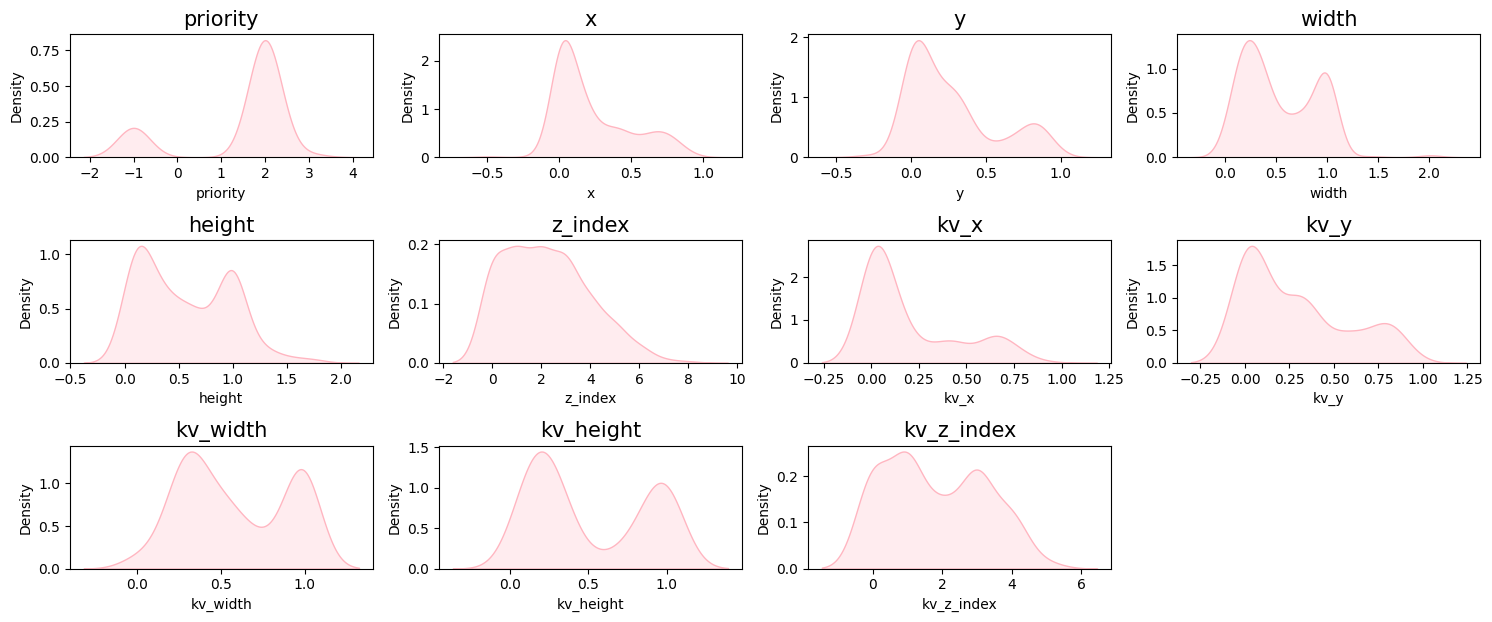

In [ ]:
plt.figure(figsize=(15, 10))

for i, columna in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    sns.kdeplot(df_normalizado[columna], color='lightpink', fill=True)
    plt.title(f'{columna}', fontsize=15)

plt.tight_layout()
plt.show()

# Análisis de Histogramas de Variables (FlexSAIze)

**priority**<p>

La mayoría de los elementos se agrupan en prioridad 2, lo que corresponde principalmente a los productos, lo cual es esperado en la mayoría de los banners.<p>

Se observa una menor presencia en prioridad 3 (CTA) y prioridad -1 (background), lo que refleja que hay menos elementos clave de llamada a la acción (CTA) y fondo comparados con productos y textos.<p>

Nota: La distribución parece estar sesgada, lo que podría indicar la necesidad de una normalización si queremos analizar comparaciones más equilibradas entre los diferentes tipos de prioridad.<p>

**x (posición horizontal normalizada)**<p>

Existe una alta concentración de elementos en la parte izquierda del lienzo (valores entre 0 y 0.2), lo que indica que muchos de los elementos clave se posicionan en esta área.<p>

También hay dispersión hasta 0.8, lo que indica que algunos banners posicionan elementos importantes hacia la parte derecha del canvas.<p>

Normalización recomendada: Si bien los valores están en un rango [0, 1], la gran concentración en valores bajos sugiere que podría ser útil aplicar técnicas de normalización si se busca una distribución más uniforme.<p>

**y (posición vertical normalizada)**<p>

La concentración predominante está en la zona superior (valores entre 0 y 0.2), lo que sugiere que muchos de los elementos se colocan en la parte superior del banner.<p>

Sin embargo, también se observa una presencia en valores más altos (0.6–0.8), típicamente usados para elementos legales o CTAs.<p>

Normalización recomendada: Podría ser útil si se buscan patrones específicos en la ubicación de los elementos, especialmente para analizar el uso de la zona superior frente a las partes inferiores del canvas.<p>

**width (ancho relativo del elemento)**<p>

Se observa que muchos de los elementos tienen un ancho cercano a 1.0, lo que corresponde a los backgrounds de pantalla completa.<p>

El resto se distribuye en valores más pequeños (0.1–0.3), típicos de elementos como logos o CTAs.<p>

Normalización recomendada: Este valor ya parece estar bien distribuido, pero si se quieren hacer comparaciones detalladas entre los tamaños relativos de los elementos, podría ser necesario realizar alguna normalización.<p>

**height (alto relativo del elemento)**<p>

Picos marcados en valores cercanos a 1.0, lo que nuevamente indica que muchos elementos son backgrounds de tamaño completo.<p>

La distribución en esta variable es más dispersa que en el ancho, lo que refleja mayor variabilidad en las proporciones verticales de los elementos.<p>

Normalización recomendada: No parece ser necesaria, a menos que se busque comparar con mayor precisión las alturas relativas de los elementos.<p>

**z_index**<p>

La mayoría de los valores se concentran entre 0 y 2, lo que sugiere que la mayoría de los elementos se encuentran en las capas inferiores (productos y fondos).<p>

Los valores más altos, hasta 7, muestran que hay una jerarquía de capas, aunque con menos densidad en las capas superiores.<p>

Normalización recomendada: Si bien no parece ser necesario normalizar, si se desea analizar la distribución de capas de manera más uniforme, se podría aplicar alguna técnica de normalización.<p>

**kv_x (posición X en Key Visual destino)**<p>

La mayoría de los elementos en el Key Visual se agrupan alrededor de 0.1, indicando que la mayoría de los elementos se ubican en el lado izquierdo del lienzo en la versión adaptada.<p>

Hay poca presencia en valores superiores a 0.4, lo que muestra que la mayoría de los elementos no se desplazan mucho hacia la derecha en la adaptación.<p>

Normalización recomendada: No es estrictamente necesario, pero si se quiere hacer una comparación más precisa sobre la ubicación de los elementos en el Key Visual, se podría considerar.<p>

**kv_y (posición Y en Key Visual destino)**<p>

Los valores se concentran entre 0.1 y 0.2, indicando que la mayoría de los elementos adaptados se colocan en la parte superior del lienzo.<p>

Hay dispersión limitada, lo que muestra que los elementos se colocan de manera consistente en la zona superior del key visual.<p>

Normalización recomendada: Al ser una variable que está bien concentrada, normalizar podría no ser necesario, pero si se requieren análisis más detallados, sería recomendable hacerlo.<p>

**kv_width (ancho relativo en Key Visual destino)**<p>

Picos entre 0.2 y 0.4, lo que indica que los elementos adaptados suelen ser relativamente pequeños en comparación con el lienzo completo.<p>

Ausencia de valores cercanos a 1.0, lo que sugiere que ningún elemento adaptado ocupa todo el ancho, excepto los fondos.<p>

Normalización recomendada: Podría ser útil, ya que la mayoría de los valores son bajos, y la normalización podría ayudar a comparar los elementos más pequeños entre sí.<p>

**kv_height (alto relativo en Key Visual destino)**

La mayoría de los valores son menores o iguales a 0.5, lo que indica que los elementos adaptados suelen ser bajos en proporción al lienzo.<p>

La distribución es relativamente pareja entre 0.2 y 0.6, lo que muestra cierta variedad en las proporciones verticales de los elementos.<p>

Normalización recomendada: Este valor no parece requerir normalización a menos que se quiera hacer un análisis más exhaustivo sobre la variabilidad de las proporciones.<p>

**kv_z_index (z-index en Key Visual destino)**

Los valores se concentran entre 1 y 2, lo que refleja que la mayoría de los elementos adaptados están en capas inferiores en el Key Visual.

La baja dispersión en esta variable muestra que se utilizan pocas capas distintas en la salida final.

Normalización recomendada: No es estrictamente necesaria, pero si se quieren hacer comparaciones entre diferentes jerarquías de capas, podría ser útil.


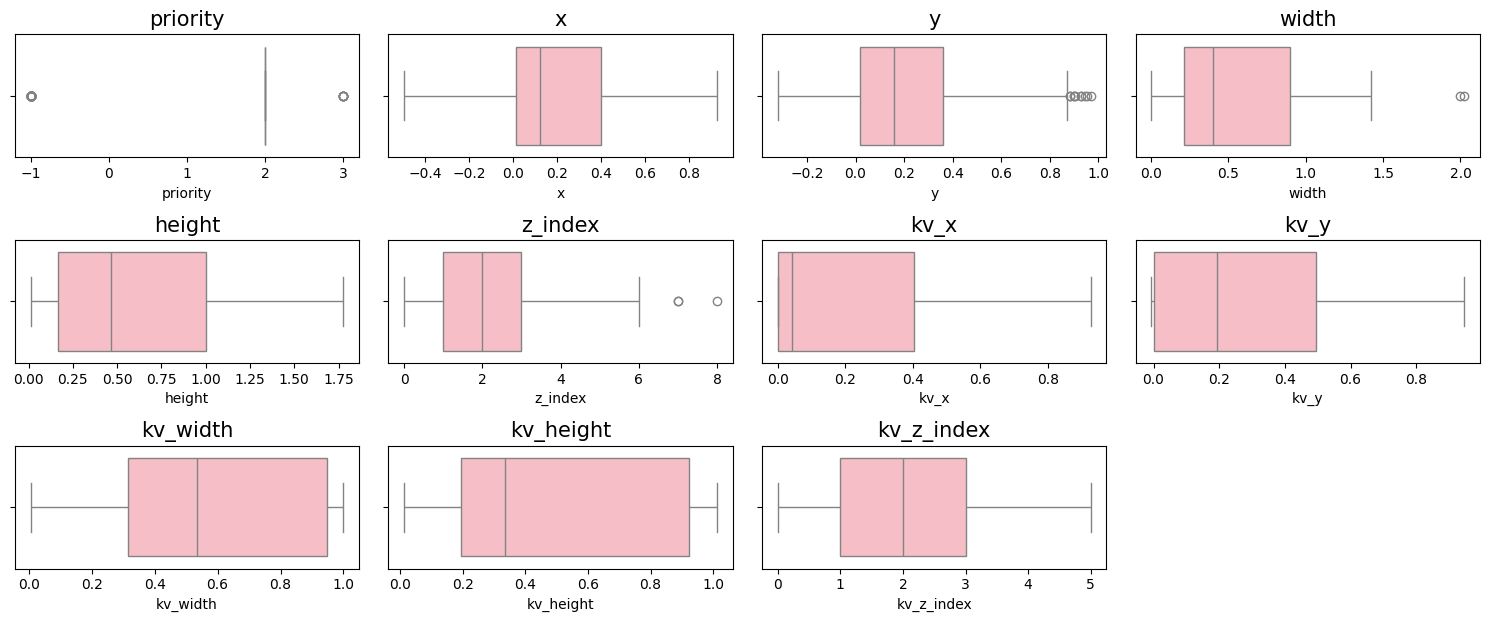

In [ ]:
plt.figure(figsize=(15, 10))
for i, columna in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df_normalizado[columna], color='lightpink')
    plt.title(f'{columna}', fontsize=15)

plt.tight_layout()
plt.show()

#Análisis de Boxplots de Variables (FlexSize)

**1. priority**

El boxplot muestra una distribución sesgada, donde la mayoría de los elementos tienen prioridad 2, que parece ser la categoría más común.

Se observan algunos outliers en valores de prioridad -1 (background) y prioridad 3 (CTA). Estos valores atípicos reflejan que hay un número pequeño de banners con elementos de fondo y CTA en comparación con los productos y textos.

Implicación: La mayoría de los elementos en los banners son productos, con menos foco en el fondo y las llamadas a la acción (CTA). Los valores atípicos podrían indicar casos especiales en los que se priorizan otros elementos, como legales o textos.

**2. x (posición horizontal normalizada)**

Distribución: Los elementos tienden a concentrarse en el lado izquierdo del lienzo, entre 0 y 0.2. Esto sugiere que muchos de los elementos clave están posicionados en la parte izquierda del banner.

Outliers: Hay algunos outliers que se extienden hasta 0.8, indicando que ciertos banners colocan elementos importantes más hacia la derecha.

Implicación: Esta concentración hacia la izquierda podría estar alineada con las convenciones de diseño de banners, donde los elementos clave se ubican en el lado izquierdo. Los outliers podrían indicar ajustes en el diseño dependiendo del formato o la campaña.

**3. y (posición vertical normalizada)**

Distribución: La mayoría de los elementos se encuentran en la parte superior del lienzo, entre 0 y 0.2. Esto indica que muchos elementos clave se colocan en la parte superior del banner.

Outliers: Algunos valores atípicos están en el rango 0.6–0.8, lo que podría reflejar elementos en la parte inferior, como CTAs o textos legales.

Implicación: La concentración en la parte superior sugiere que los elementos visuales de mayor importancia se colocan arriba, lo que es común en muchos diseños. Los valores atípicos en la parte inferior podrían ser ejemplos de ajustes específicos para ciertos tipos de banners o campañas.

**4. width (ancho relativo del elemento)**

Distribución: La mayoría de los elementos tienen un ancho cercano a 1.0, lo que está relacionado con los fondos de pantalla completa.

Outliers: Los outliers muestran elementos con un ancho pequeño (alrededor de 0.1–0.3), que podrían corresponder a CTAs o logos.

Implicación: La presencia de elementos de fondo con un ancho completo es común, pero los valores más pequeños podrían representar otros elementos más pequeños, como logotipos, textos o botones CTA. La dispersión sugiere que los banners incluyen tanto elementos grandes (fondos) como más pequeños (logos o llamados a la acción).

**5. height (alto relativo del elemento)**

Distribución: Los elementos tienen un alto medio, concentrándose principalmente entre 0.2 y 1.0, con una mediana cerca de 0.5.

Outliers: Al igual que en el width, existen outliers que están más cerca de 1.0, lo que refleja elementos con un alto completo, posiblemente fondos.

Implicación: La distribución indica que la mayoría de los elementos no ocupan toda la altura del lienzo, con un enfoque en elementos de proporciones equilibradas. Los outliers podrían reflejar fondos o elementos visuales con una mayor proporción vertical.

**6. z_index**

Distribución: Los valores se concentran entre 0 y 2, indicando que la mayoría de los elementos están en las capas inferiores, lo que es esperado para elementos como productos o fondos.

Outliers: Existen valores atípicos hasta 7, lo que sugiere que hay elementos que se posicionan en capas más altas.

Implicación: La concentración en capas inferiores muestra que los productos y fondos suelen ocupar las capas más cercanas al fondo del lienzo. Los valores atípicos en las capas superiores podrían indicar elementos como CTAs o logos, que requieren una visibilidad superior.

**7. kv_x (posición X en Key Visual destino)**

Distribución: La mayoría de los elementos en el Key Visual se encuentran en la parte izquierda del lienzo, con una concentración cerca de 0.1.

Outliers: Hay algunos outliers que se extienden hacia 0.4, lo que indica que algunos elementos se desplazan más hacia la derecha en la versión adaptada.

Implicación: Esta tendencia refleja que los elementos clave en el Key Visual suelen estar en el lado izquierdo, pero algunos ajustes pueden requerir que los elementos se desplacen hacia la derecha en la adaptación.

**8. kv_y (posición Y en Key Visual destino)**

Distribución: Los elementos se agrupan entre 0.1 y 0.2 en la vertical, lo que indica que la mayoría de los elementos en el Key Visual se encuentran en la parte superior.

Outliers: La dispersión es limitada, y no se observan muchos valores fuera de este rango.

Implicación: La posición de los elementos en el Key Visual refleja un diseño coherente con la parte superior del lienzo. La falta de variabilidad sugiere que los elementos adaptados siguen la misma regla de posicionamiento vertical.

**9. kv_width (ancho relativo en Key Visual destino)**

Distribución: La mayoría de los elementos adaptados tienen un ancho relativamente pequeño (entre 0.2 y 0.4), lo que sugiere que no se ocupan grandes áreas del lienzo en la adaptación.

Outliers: No hay valores cercanos a 1.0, lo que indica que los elementos en el Key Visual no suelen ocupar todo el espacio horizontal, a excepción de los fondos.

Implicación: Los valores atípicos reflejan que los elementos en el Key Visual son generalmente proporcionales y no ocupan todo el ancho, salvo en casos de fondos o grandes imágenes.

**10. kv_height (alto relativo en Key Visual destino)**

Distribución: Los valores se concentran en torno a 0.2 y 0.5, lo que sugiere que los elementos adaptados son relativamente pequeños en altura.

Outliers: La dispersión en los valores de altura indica que no todos los elementos tienen el mismo tamaño vertical.

Implicación: La mayoría de los elementos no ocupan todo el alto del lienzo del Key Visual, pero existen variaciones que podrían estar relacionadas con fondos o elementos destacados que requieren mayor espacio vertical.

**11. kv_z_index (z-index en Key Visual destino)**

Distribución: La mayoría de los elementos adaptados se encuentran entre 1 y 2 en el z-index, lo que refleja que las capas en el Key Visual son consistentes y no se utilizan demasiadas capas diferentes.

Outliers: Los valores de z-index no muestran una gran dispersión, lo que indica que la jerarquía de las capas se mantiene estable.

Implicación: La consistencia en el z-index en el Key Visual sugiere que la estructura del lienzo es simple, con un número limitado de capas.

# Análisis de variables de texto

*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

In [ ]:
df_normalizado.describe(include = 'object').T

,count,unique,top,freq
file,331,65,Gatorade_KHKG_1140X40.psd,9
layer_name,331,8,COPY,71
type,331,7,TEXT,85


**file:**
Nombre del archivo del banner que está siendo transformado.

•Cardinalidad: 65 banners únicos.<p><p>

**layer_name:** Corresponde al nombre original de la capa dentro del archivo PSD.

•Cardinalidad: 8 nombres distintos.

•Moda: COPY, con 71 apariciones.<p>
Este valor dominante refleja que una gran proporción de las capas analizadas están etiquetadas como contenido textual o copys dentro de los diseños.

**type:**
Indica el tipo de elemento visual que compone cada capa del banner (ej. texto, producto, logo, etc.). Este campo es derivado del layer_name usando reglas predefinidas.

•Cardinalidad:7 tipos diferentes.

•Moda: TEXT, con 85 apariciones.
La alta frecuencia de TEXT confirma que los elementos textuales (copys, subheadings, etc.) son los más comunes en las composiciones analizadas.

<Figure size 1500x1000 with 0 Axes>

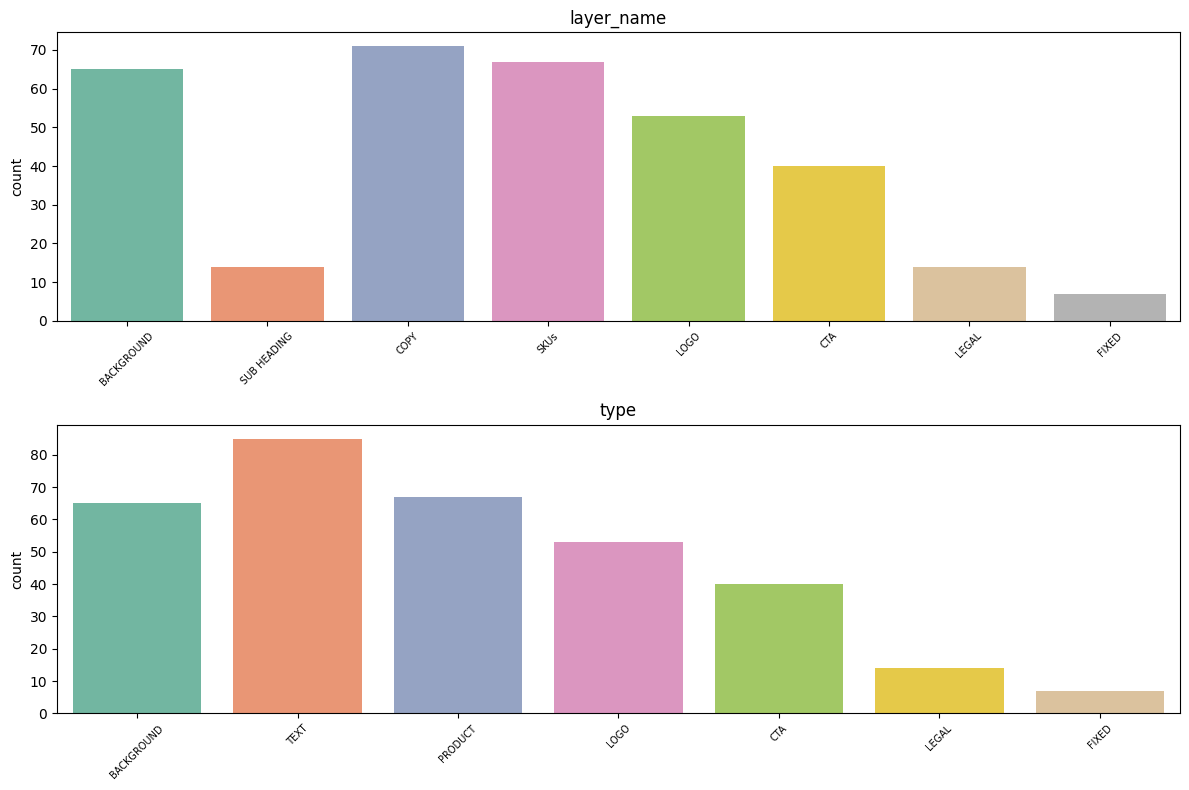

In [ ]:
categorical_columns = ['layer_name', 'type']
color_palette = 'Set2'

plt.figure(figsize=(15, 10))

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes = axes.ravel()

for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=df_normalizado[col], ax=ax, hue=df_normalizado[col], palette=color_palette, legend=False)
    ax.set(title=f'{col}', xlabel=None)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
plt.tight_layout()
plt.show()

# Análisis de correlación (bivariante y multivariante)

In [ ]:
cols = ["x", "y", "width", "height", "kv_x", "kv_y", "kv_width", "kv_height"]
dfc = df_normalizado[cols].copy()

# Si hay NaNs:
dfc = dfc.dropna(subset=cols)



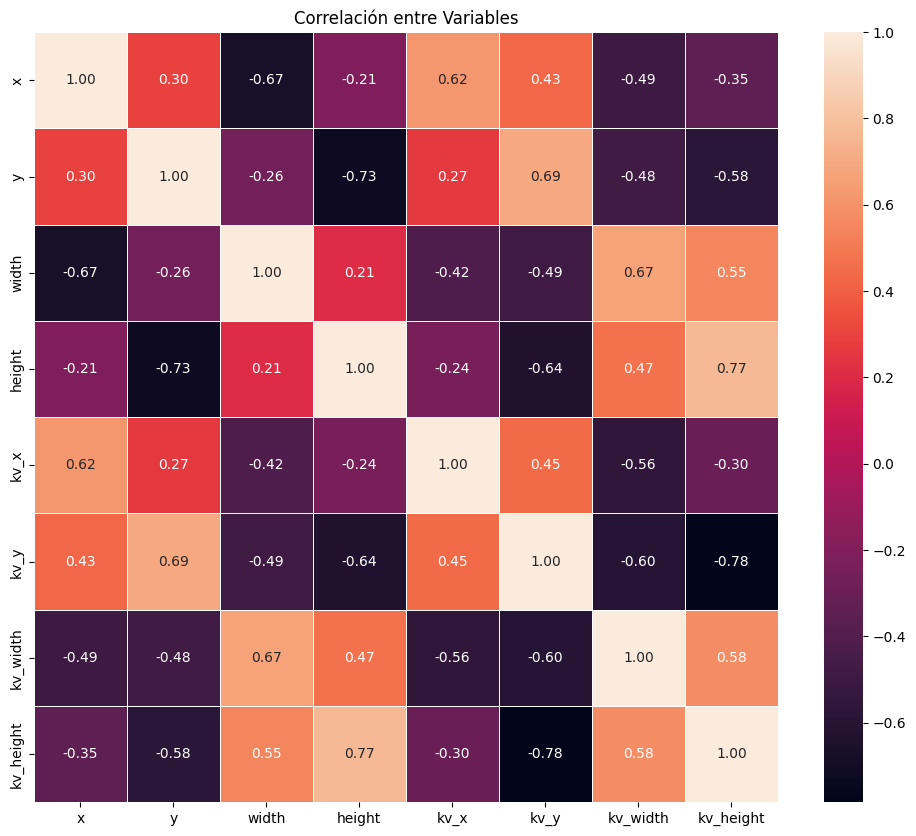

In [ ]:
correlation_matrix = dfc.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Variables')
plt.show()

* kv_x vs kv_y (0.94)

  - Alta correlación positiva: los elementos que se mueven en X también se mueven en Y en la adaptación.

  - Sugiere traslaciones conjuntas, no movimientos independientes.

* kv_x vs kv_height (0.75) y kv_y vs kv_height (0.71)

  - La posición en el KV está asociada con el tamaño vertical.

  - Indica que al cambiar ubicación también suele cambiar la escala en altura.

* kv_width vs kv_height (-0.74)

  - Fuerte correlación negativa: a mayor ancho, menor altura.

  - Evidencia una compensación de proporciones en la adaptación.

* x vs width (-0.63)

  - Los elementos más a la derecha tienden a ser más estrechos.

  - Puede estar relacionado con logos o CTAs colocados en esquinas.

* y vs height (-0.66)

  - Los elementos más abajo suelen ser más bajos en altura.

  - Posiblemente reflejo de textos legales o CTAs pequeños al pie del banner.

No es posible aplicar un análisis de boxplot relacional basado en la variable de salida, ya que esta es continua y no categórica (binaria). Por lo tanto, este tipo de análisis, que generalmente compara distribuciones entre categorías, no resulta adecuado en este caso.

# Conclusión

En esta primera etapa del proyecto FlexSAIze, se realizó un análisis exploratorio exhaustivo de los datos recopilados de banners publicitarios y sus key visuals, sentando las bases para el desarrollo de un sistema de adaptación inteligente de layouts multiformato mediante inteligencia artificial.<p>

Los datos mostraron una diversidad significativa en la composición de los banners, con predominancia de elementos textuales y productos, y una clara jerarquía visual basada en prioridades asignadas por tipo de elemento. Este entendimiento es clave para la futura automatización, ya que permitirá al modelo de IA reconocer la importancia relativa de cada componente visual en diferentes formatos.<p>

El análisis de posiciones y tamaños de los elementos visuales mostró patrones consistentes, como la tendencia a ubicar elementos importantes en la parte superior y lateral izquierda del canvas, y a mantener proporciones específicas según el tipo de elemento (fondos, logos, CTAs, etc.). Estas observaciones serán fundamentales para definir reglas y restricciones dentro del algoritmo de adaptación.<p>

Asimismo, se identificó la presencia de datos faltantes vinculados a la ausencia de key visuals completos o elementos exclusivos de los banners adaptados, lo que subraya la complejidad del proceso creativo y la necesidad de que el modelo maneje excepciones y particularidades propias de cada campaña.
<p>
Finalmente, se confirmó que las variables numéricas predominantes en el dataset tienen naturaleza continua, lo que orienta el diseño del análisis estadístico y la modelación posterior, descartando enfoques basados en clasificación binaria para algunas variables clave.<p>

Esta etapa establece un marco sólido para avanzar hacia la construcción del modelo de visión computacional y aprendizaje automático, con un entendimiento claro de las características de los datos y las demandas creativas del negocio. Así, FlexSAIze avanza en su objetivo de automatizar la adaptación de banners, mejorando la eficiencia operativa y la coherencia visual en las campañas de PepsiCo.